# Linear Regression Model for predicting property prices in the city of Montreal, Canada.

Load required packages.

In [1]:
import os
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Start the clock for estimating the code execution time.

In [2]:
t0 = time.time()

Load the dataset, and drop the **address** column from the dataset.

In [3]:
path = os.getcwd() +"/clean_Montreal_property_listings.xlsx"
data = pd.read_excel(path)
data.drop(columns= 'address', inplace= True)
print(data.shape)
data.head()

(813, 3)


,price,region,bedrooms
0,849000.0,Mercier / Hochelaga / Maisonneuve,3
1,420000.0,Villeray / St-Michel / Parc-Extension,2
2,699000.0,Pointe-Aux-Trembles / Montréal-Est,3
3,349000.0,Rosemont / La Petite Patrie,1
4,959000.0,Ahuntsic / Cartierville,4


Check NaN values.

In [4]:
data.isna().sum()

price       2
region      0
bedrooms    0
dtype: int64

Drop the NaN values.

In [5]:
data.dropna(inplace= True)

In [6]:
data.isna().sum()

price       0
region      0
bedrooms    0
dtype: int64

Check the range of listing prices in different regions.



In [7]:
data_describe = data.groupby('region')['price'].describe().reset_index()[['region','count', 'mean', 'min', 'max']].round(3)
data_describe.sort_values(by= 'count', ascending= False, inplace= True)
data_describe.rename(columns= 
    {'count' : 'no_of_listings',
    'mean': 'mean_price',
    'min' : 'min_price',
    'max' : 'max_price'}).reset_index().drop(columns= ['index'])

,region,no_of_listings,mean_price,min_price,max_price
0,Ville-Marie (Centre-Ville et Vieux Mtl),143.0,622306.566,264900.0,2650000.0
1,Mercier / Hochelaga / Maisonneuve,87.0,616634.368,209000.0,2400000.0
2,Rosemont / La Petite Patrie,62.0,694286.452,265000.0,2750000.0
3,Ahuntsic / Cartierville,62.0,625556.435,239000.0,1569000.0
4,Villeray / St-Michel / Parc-Extension,53.0,701269.698,269000.0,2450000.0
5,Le Plateau-Mont-Royal,50.0,867939.400,275000.0,2995000.0
6,Le Sud-Ouest,46.0,677583.652,229500.0,1650000.0
7,Côte-des-Neiges / Notre-Dame-de-Grâce,41.0,646209.756,265000.0,2850000.0
8,Saint-Laurent,39.0,689064.436,295000.0,1750000.0
9,Griffintown,29.0,495055.172,259000.0,810000.0



Add a new column into the dataframe named **pricem** showing house price in the units of Million dollars.

In [8]:
data['pricem'] = data['price']/1e6

Drop the **price** column.

In [9]:
data.drop(columns= ["price"], inplace= True)
data

,region,bedrooms,pricem
0,Mercier / Hochelaga / Maisonneuve,3,0.8490
1,Villeray / St-Michel / Parc-Extension,2,0.4200
2,Pointe-Aux-Trembles / Montréal-Est,3,0.6990
3,Rosemont / La Petite Patrie,1,0.3490
4,Ahuntsic / Cartierville,4,0.9590
...,...,...,...
808,Le Sud-Ouest,5,0.4980
809,Côte-des-Neiges / Notre-Dame-de-Grâce,2,0.5989
810,Côte-St-Luc / Hampstead / Montréal-Ouest,1,0.2500
811,Montréal-Nord,3,0.4995


In [10]:
data.dtypes

region       object
bedrooms      int64
pricem      float64
dtype: object

In [11]:
print("The maximum price of a house listed is " + str(max(data.pricem)) + " million dollars.")
print("------------------------------------------------------------")
print("The minimum price of a house listed is " + str(min(data.pricem)) + " million dollars.")

The maximum price of a house listed is 2.995 million dollars.
------------------------------------------------------------
The minimum price of a house listed is 0.209 million dollars.


Distribution of house prices.

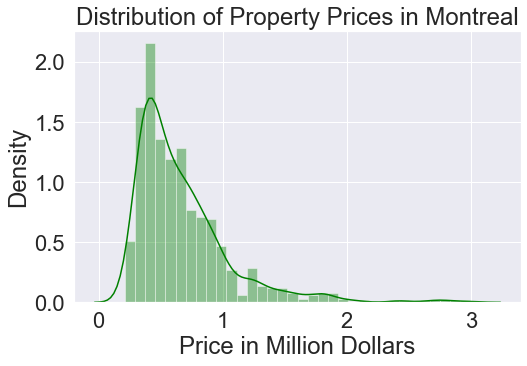

In [12]:
sns.set(font_scale=2)
plt.figure(figsize=(8,5))
sns.distplot(data.pricem, color= 'green')
plt.title("Distribution of Property Prices in Montreal")
plt.xlabel('Price in Million Dollars')
plt.ylabel('Density');

For our modelling, we keep the houses with price less than 1.5 Million dollars.

In [13]:
data = data.loc[data.pricem < 1.5]

Label each region with a distinct digit, the process known as label encoding.

This helps finding the correlation of the column region with other features.

In [14]:
data_corr = data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
region_code = le.fit_transform(data.region)
data_corr["region_code"] = region_code
print(data_corr.shape)
data_corr.drop(columns= ["region"], inplace= True)
data_corr

(779, 4)


/var/folders/q9/k5pzlrtn1c92hpddrxp2mjsr0000gn/T/ipykernel_4786/3024532173.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_corr["region_code"] = region_code
/var/folders/q9/k5pzlrtn1c92hpddrxp2mjsr0000gn/T/ipykernel_4786/3024532173.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_corr.drop(columns= ["region"], inplace= True)


,bedrooms,pricem,region_code
0,3,0.8490,15
1,2,0.4200,29
2,3,0.6990,20
3,1,0.3490,23
4,4,0.9590,0
...,...,...,...
808,5,0.4980,14
809,2,0.5989,4
810,1,0.2500,3
811,3,0.4995,17


Check correlation between different features.

(array([0.5, 1.5, 2.5]),
 [Text(0.5, 0, 'bedrooms'),
  Text(1.5, 0, 'pricem'),
  Text(2.5, 0, 'region_code')])

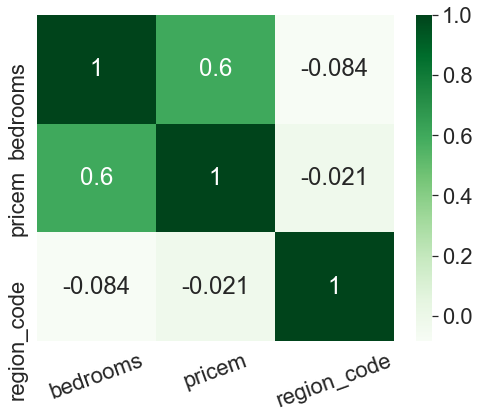

In [15]:
corr_matrix = data_corr.corr()
sns.set(font_scale=2)
plt.figure(figsize = (8,6))
sns.heatmap(data = corr_matrix, color = 'green', annot = True, cmap= "Greens")
plt.xticks(rotation = 20)

As can be seen, the price is not correlated to the region where the property is listed.

Therefore, we only use the feature named **bedrooms** to build our linear regression model.

Data pre-processing.

In [16]:
Y = data['pricem'].values
print(len(Y))
X = data["bedrooms"].values
print(len(X))

779
779


Split the data into training and testing sets.



In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.9, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(701,)
(78,)
(701,)
(78,)


Linear regression model development.

In [18]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train.reshape(-1, 1), Y_train)

LinearRegression()

Model evaluation.

In [19]:
from sklearn.metrics import mean_absolute_error

# model evaluation for training set
y_train_predict = lm.predict(X_train.reshape(-1, 1))
mae = mean_absolute_error(Y_train, y_train_predict)
print("The model performance for training set")
print("--------------------------------------")
print('mean_absolute_error is ' + str(mae))
print("\n")

# model evaluation for testing set
y_test_predict = lm.predict(X_test.reshape(-1, 1))
mae = mean_absolute_error(Y_test, y_test_predict)
print("The model performance for testing set")
print("--------------------------------------")
print('mean_absolute_error is ' + str(mae))

The model performance for training set
--------------------------------------
mean_absolute_error is 0.16462526938142794


The model performance for testing set
--------------------------------------
mean_absolute_error is 0.15436082651766259


Below we take a quick look at some of the predictions made my the model.

In [20]:
model_check_quick = pd.concat([
    pd.DataFrame({"bedrooms" : X_test}).reset_index().drop(columns= ["index"]), 
    pd.DataFrame({"real_price" : Y_test}).reset_index().drop(columns= ["index"]), 
    pd.DataFrame({"predicted_price" : y_test_predict}).reset_index().drop(columns= ["index"])
], axis = 1)
model_check_quick.head(30)

,bedrooms,real_price,predicted_price
0,2,0.920000,0.556752
1,7,0.869000,1.111027
2,5,0.878000,0.889317
3,4,0.995000,0.778462
4,2,0.638900,0.556752
5,2,0.649000,0.556752
6,3,0.599000,0.667607
7,3,0.775000,0.667607
8,2,0.334900,0.556752
9,1,0.309000,0.445897


Create required dataframe to visualize the regression model output.

In [21]:
df1 = pd.concat([
    pd.DataFrame({"bedrooms" : X_test}).reset_index().drop(columns= ["index"]), 
    pd.DataFrame({"price" : Y_test}).reset_index().drop(columns= ["index"]), 
], axis = 1)
df1["label"] = "real_price"

df2 = pd.concat([
    pd.DataFrame({"bedrooms" : X_test}).reset_index().drop(columns= ["index"]), 
    pd.DataFrame({"price" : y_test_predict}).reset_index().drop(columns= ["index"]), 
], axis = 1)
df2["label"] = "predicted_price"
df3 = pd.concat([df1, df2], axis = 0)
df3

,bedrooms,price,label
0,2,0.920000,real_price
1,7,0.869000,real_price
2,5,0.878000,real_price
3,4,0.995000,real_price
4,2,0.638900,real_price
...,...,...,...
73,3,0.667607,predicted_price
74,2,0.556752,predicted_price
75,5,0.889317,predicted_price
76,1,0.445897,predicted_price


Visualize the performance of regression model.

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

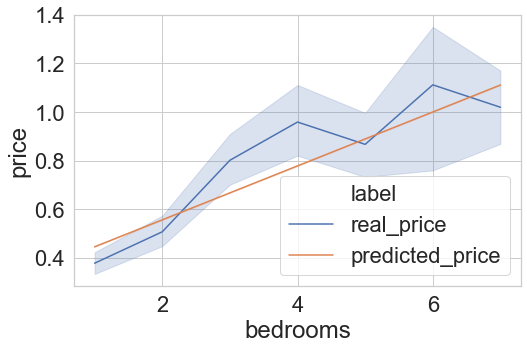

In [22]:
sns.set(font_scale= 2)
sns.set_style("whitegrid")
plt.figure(figsize= (8,5))
sns.lineplot(data= df3, x = "bedrooms", y = "price", hue= "label")

In [23]:
print('The execution of entire code in the notebook (excluding time to load the packages) took', time.time()-t0, 'seconds.')

The execution of entire code in the notebook (excluding time to load the packages) took 1.6900181770324707 seconds.


Author:

Mangaljit Singh